In [1]:
import numpy as np
import os
import cv2
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [2]:
test_load = os.listdir("/content/test/")

x_test =[]

for image in test_load:
  img = cv2.imread("/content/test/"+image)
  if img is not None:
    img = cv2.resize(img, [300,300], interpolation = cv2.INTER_AREA)
    x_test.append(img)


In [3]:
x_test = np.array(x_test)
print(x_test.shape)

(4, 300, 300, 3)


In [38]:
noise_factor = 35
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_test_noisy.shape

(4, 300, 300, 3)

In [39]:
def PSNR(gt, image, max_value=1):
    """"Function to calculate peak signal-to-noise ratio (PSNR) between two images."""
    height, width , channels= gt.shape
    # gt=cv2.resize(gt, [300, 300], interpolation=cv2.INTER_CUBIC)
    # print(gt.shape, image.shape)
    mse = np.mean((gt - image) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))

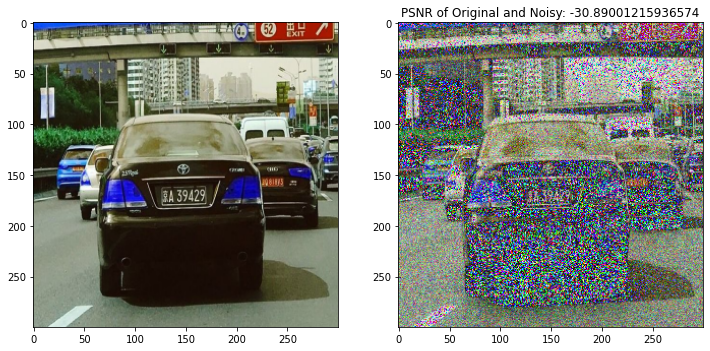

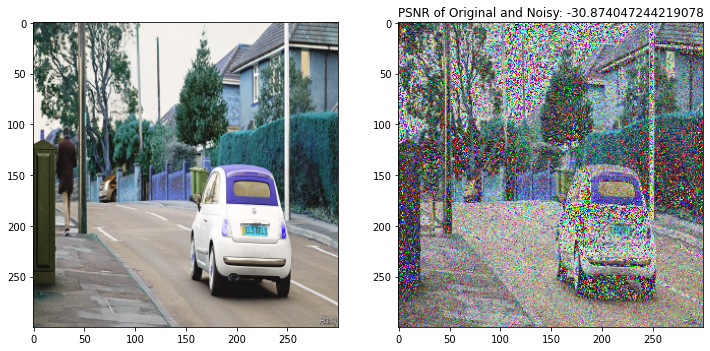

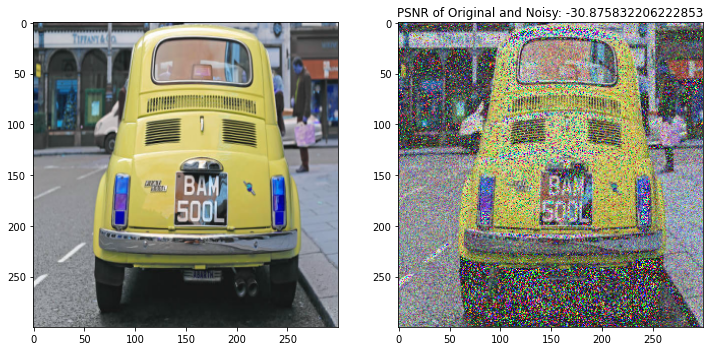

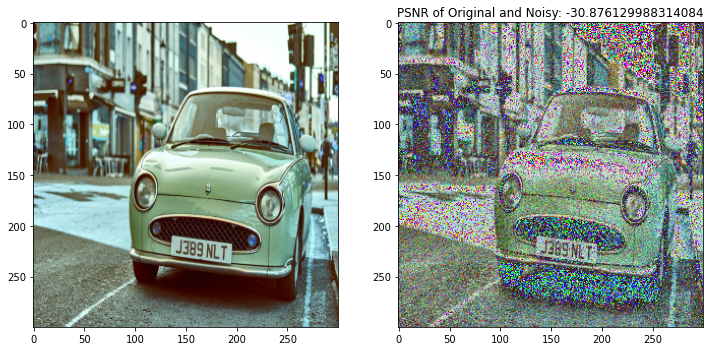

In [40]:
for i in range(0,4):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))
  plt.title(f'PSNR of Original and Noisy: {PSNR(x_test[i], x_test_noisy[i])}')
  ax1.imshow(x_test[i])
  ax2.imshow(x_test_noisy[i].astype('uint8'))
  plt.show()